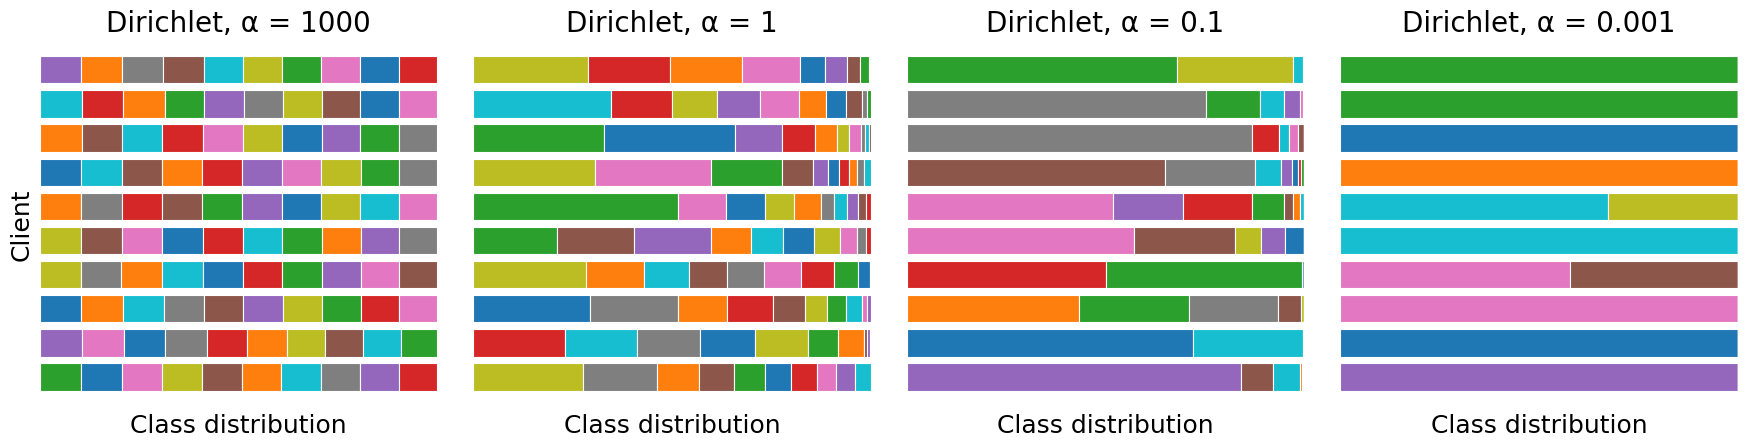

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set global font size
plt.rcParams.update({'font.size': 24})

# Simulate Dirichlet-distributed label splits for visualization
def simulate_dirichlet_split(num_clients, num_classes, alpha, seed=0):
    np.random.seed(seed)
    label_distribution = np.random.dirichlet([alpha] * num_classes, num_clients)
    return label_distribution

num_classes = 10
class_colors = sns.color_palette("tab10", num_classes)
alphas = [1000, 1, 0.1, 0.001]
num_clients = 10

fig, axs = plt.subplots(1, len(alphas), figsize=(18, 5), sharey=True)

for idx, alpha in enumerate(alphas):
    ax = axs[idx]
    dist = simulate_dirichlet_split(num_clients, num_classes, alpha)
    for client_id in range(num_clients):
        x_start = 0
        for class_id in np.argsort(dist[client_id])[::-1]:
            width = dist[client_id][class_id]
            ax.barh(
                client_id, width, left=x_start,
                color=class_colors[class_id],
                edgecolor='white', linewidth=0.8
            )
            x_start += width

    ax.set_title(f'Dirichlet, α = {alpha}', fontsize=20)
    ax.set_xlabel('Class distribution', fontsize=18)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

axs[0].set_ylabel('Client', fontsize=18)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()